<a href="https://colab.research.google.com/github/AzadMehedi/Numpy/blob/main/Advanced_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy array vs Python list

In [ ]:
# Speed
#list
a = [i for i in range(10000000)]
b = [i for i in range(10000000, 20000000)]

c = []

import time
start = time.time()
for i in range(len(a)):
  c.append(a[i]+b[i]) 
print(time.time()-start)


2.4041149616241455


In [ ]:
# numpy
import numpy as np
a = np.arange(10000000)
b = np.arange(10000000, 20000000)

start = time.time()
c = a+b
print(time.time()-start)

0.021371841430664062


In [ ]:
2.4041149616241455/0.021371841430664062
# in this calculation numpy is 112 time faster than python list

112.48983712628291

In [1]:
import numpy as np
import time
import sys

In [2]:
# memory in python list
a = [i for i in range(10000000)]
import sys
sys.getsizeof(a)

81528048

In [4]:
# memory in numpy
a = np.arange(10000000, dtype=np.int8)  # can set dtype
sys.getsizeof(a)

10000104

# Advanced Indexing

In [5]:
# Normal Indexing and slicing
a = np.arange(12).reshape(4,3)
a 

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [8]:
# find out 4,5,7,8
a[1:3,1:]

array([[4, 5],
       [7, 8]])

In [13]:
# fancy Indexing
# find out 1,3,4th row [ 0,  1,  2], [ 6,  7,  8], [ 9, 10, 11]

a[[0,2,3]]  # passing row index through list

array([[ 0,  1,  2],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [15]:
a = np.arange(24).reshape(6,4)
a 

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [17]:
# find out 1,3,4,6th row 
a[[0,2,3,5]]   #passing row index through list

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [20, 21, 22, 23]])

In [22]:
# find out 1,2,3rd column 
a[:,[0,1,2]]    # all rows, 0,1,2 index as columns

array([[ 0,  1,  2],
       [ 4,  5,  6],
       [ 8,  9, 10],
       [12, 13, 14],
       [16, 17, 18],
       [20, 21, 22]])

In [25]:
# Boolean Indexing
import numpy as np
a = np.random.randint(1,100,24).reshape(6,4)    # randint(start, end, how many number)
a

array([[31, 67, 60, 39],
       [18, 30, 42, 25],
       [74, 68, 66, 22],
       [40, 55, 44, 69],
       [88,  5, 93, 54],
       [ 6, 28,  7, 10]])

In [26]:
# find all numbers greater than 50
a>50

array([[False,  True,  True, False],
       [False, False, False, False],
       [ True,  True,  True, False],
       [False,  True, False,  True],
       [ True, False,  True,  True],
       [False, False, False, False]])

In [27]:
a[a>50]

array([67, 60, 74, 68, 66, 55, 69, 88, 93, 54])

In [28]:
# find out even numbers
a[a%2==0]

array([60, 18, 30, 42, 74, 68, 66, 22, 40, 44, 88, 54,  6, 28, 10])

In [31]:
# find all numbers greater than 50 and are even
a[(a>50) & (a%2==0)]   # when we work with boolean numbers we have to use bitwise and.

array([60, 74, 68, 66, 88, 54])

In [35]:
# find all numbers not divisible by 7
a[a%7!=0] # or use a divisible operator '~'
# a[~(a%7 == 0)]


array([31, 67, 60, 39, 18, 30, 25, 74, 68, 66, 22, 40, 55, 44, 69, 88,  5,
       93, 54,  6, 10])

# Broadcasting

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.

The smaller array is “broadcast” across the larger array so that they have compatible shapes.

array([31, 67, 60, 39, 18, 30, 25, 74, 68, 66, 22, 40, 55, 44, 69, 88,  5,
       93, 54,  6, 10])

In [37]:
# same type
a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)

print(a)
print(b)
a+b

[[0 1 2]
 [3 4 5]]
[[ 6  7  8]
 [ 9 10 11]]


array([[ 6,  8, 10],
       [12, 14, 16]])

In [38]:
# different shape
a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)

print(a)
print(b)
a+b

[[0 1 2]
 [3 4 5]]
[[0 1 2]]


array([[0, 2, 4],
       [3, 5, 7]])

#### Broadcasting Rules

**1. Make the two arrays have the same number of dimensions.**<br>
- If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.<br>

**2. Make each dimension of the two arrays the same size.**<br>
- If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
- If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

<img src = "https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png">

In [40]:
# More example
a = np.arange(12).reshape(4,3)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [41]:
a = np.arange(12).reshape(3,4)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


ValueError: ignored

In [42]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)

print(a)
print(b)

print(a+b)

[[0 1 2]]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [44]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)

print(a)
print(b)

print(a+b)

[[0 1 2]]
[[0]
 [1]
 [2]
 [3]]
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [46]:
a = np.array([1])  # shape - (1,1)
b = np.arange(4).reshape(2,2)   # shape - (2,2)

print(a)
print(b)
print(a+b)


[1]
[[0 1]
 [2 3]]
[[1 2]
 [3 4]]


In [49]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)
print(a)
print(b) 

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


ValueError: ignored

In [50]:
a = np.arange(12).reshape(4,4)
b = np.arange(12).reshape(2,2)
print(a)
print(b) 

print(a+b)

ValueError: ignored

# Working with mathematical formulas

In [1]:
import numpy as np


In [2]:
# sigmoid

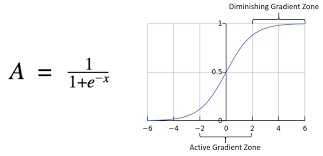

In [4]:
def sigmoid(array):
  return 1/(1+np.exp(-(array)))

a = np.arange(10)
sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661])

In [8]:
# Mean squared function

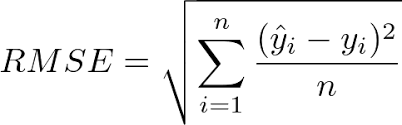

In [12]:
actual = np.random.randint(1,50,25)
predicted = np.random.randint(1,50,25)

def mse(actual, predicted):
  return np.mean((actual-predicted)**2)

mse(actual, predicted)

439.36

In [9]:
# binary cross entropy
